In [0]:
from google.colab import files 

In [2]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"mcparab","key":"8137c7a587c9b7341999dd34d25de06a"}'}

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list 

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
lava18/google-play-store-apps                            Google Play Store Apps                               2MB  2018-09-18 20:49:49           6886  
center-for-policing-equity/data-science-for-good         Data Science for Good: Center for Policing Equity    6MB  2018-10-07 16:57:28           1176  
jenny18/honey-bee-annotated-images                       Annotated Honey Bee Images                          50MB  2018-09-16 23:42:12            656  
neuromusic/avocado-prices                                Avocado Prices                                     629KB  2018-06-06 05:28:35           9917  
theworldbank/education-statistics                        Education Statistics           

In [8]:
!kaggle competitions download -c digit-recognizer

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!ls

kaggle (1).json  results.csv  sample_submission.csv  train.csv
kaggle.json	 sample_data  test.csv


In [10]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import Imputer, Normalizer, scale 
from sklearn.model_selection import train_test_split 

import keras
from keras import backend as K

Using TensorFlow backend.


In [0]:
# visualizations 
import matplotlib.pyplot as plt 

In [0]:
# Loading dataset 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [13]:
df = train_df.copy()

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [15]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
# shape of dataset 
print(train_df.shape, test_df.shape)

(42000, 785) (28000, 784)


In [0]:
y = df.label.values.astype('int32')
df = df[df.columns[1:]].values.astype('float32')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 100)

In [19]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600,)


In [0]:
test_df = test_df.values.astype('float32')

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
test_df = test_df.reshape(-1, 28, 28, 1)

In [22]:
print(x_train.shape)

(33600, 28, 28, 1)


In [0]:
new = pd.read_csv('train.csv')


In [24]:
label_counter = new.label.value_counts()
print(label_counter)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


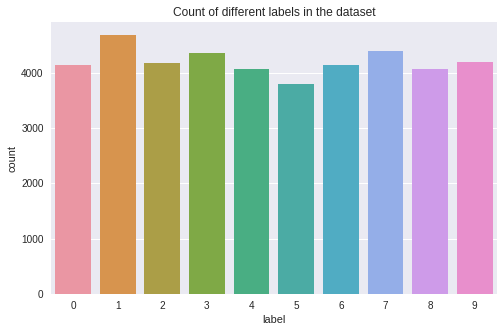

In [25]:
import seaborn as sns 

plt.subplots(figsize = (8, 5))
plt.title('Count of different labels in the dataset')
sns.countplot(x = new.label, data = new)
plt.savefig('Sample_size.png')
plt.show()

In [0]:
# Normalizing 

In [0]:
x_train = x_train / 255
x_test = x_test / 255

test_df = test_df/255

In [0]:
# label one hot encoding 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [0]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau

In [0]:
# Model

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
datagen = ImageDataGenerator(featurewise_center = False, 
                            samplewise_center = False, 
                            featurewise_std_normalization = False, 
                            samplewise_std_normalization = False,
                            zca_whitening = False, 
                            rotation_range = 10, 
                            zoom_range = 0.0, 
                            width_shift_range = 0.1,
                            height_shift_range = 0.1, 
                            horizontal_flip = False, 
                            vertical_flip = False)

datagen.fit(x_train)
                            

In [35]:
batch_size = 64
epochs  = 10
lr_reduce = ReduceLROnPlateau(monitor = 'val_acc', factor = 0.1, epsilon =  0.001, patience = 1, verbose = 1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:928: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.
  warnings.warn('`epsilon` argument is deprecated and '


In [36]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size),
                   steps_per_epoch = x_train.shape[0] // batch_size, 
                   callbacks = [lr_reduce],
                   validation_data = (x_test, y_test),
                   epochs = epochs, 
                   verbose = 2)

Epoch 1/10
 - 17s - loss: 0.2655 - acc: 0.9171 - val_loss: 0.1575 - val_acc: 0.9514
Epoch 2/10
 - 15s - loss: 0.0927 - acc: 0.9709 - val_loss: 0.0420 - val_acc: 0.9876
Epoch 3/10
 - 15s - loss: 0.0747 - acc: 0.9764 - val_loss: 0.0390 - val_acc: 0.9885

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 4/10
 - 15s - loss: 0.0477 - acc: 0.9856 - val_loss: 0.0243 - val_acc: 0.9919
Epoch 5/10
 - 15s - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0267 - val_acc: 0.9911

Epoch 00005: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Epoch 6/10
 - 15s - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0244 - val_acc: 0.9923

Epoch 00006: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Epoch 7/10
 - 15s - loss: 0.0435 - acc: 0.9870 - val_loss: 0.0246 - val_acc: 0.9921

Epoch 00007: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
Epoch 8/10
 - 15s - loss: 0.0415 - acc: 0.9877 - val_loss: 0.0246 - val_acc: 0.9921


In [37]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('valid loss :', score[0])
print('valid accuracy : ', score[1])

valid loss : 0.02447289124193568
valid accuracy :  0.9922619047619048


In [0]:
pred = model.predict(test_df)

In [39]:
pred

array([[1.4678296e-08, 3.1830254e-09, 9.9999988e-01, ..., 2.8504186e-08,
        5.7810552e-09, 1.8935178e-09],
       [9.9974281e-01, 2.6449268e-07, 2.1770171e-05, ..., 1.8070710e-06,
        4.3222440e-06, 1.2598871e-04],
       [2.5389463e-08, 2.9540324e-09, 4.8918542e-07, ..., 4.1936069e-08,
        8.9109553e-06, 9.9998105e-01],
       ...,
       [4.6252408e-11, 2.7448177e-10, 1.3265213e-08, ..., 1.0120092e-08,
        3.6968935e-08, 2.3883042e-09],
       [4.5231932e-06, 5.0278196e-08, 2.1095352e-06, ..., 2.2964516e-05,
        7.1785848e-07, 9.9987626e-01],
       [3.6853882e-09, 1.7354691e-10, 1.0000000e+00, ..., 3.3637544e-09,
        5.6864408e-08, 6.9472211e-10]], dtype=float32)

In [0]:
pred_digits = np.argmax(pred, axis = 1)
ImageId = range(1, len(pred_digits) +1)

In [41]:
pred_digits

array([2, 0, 9, ..., 3, 9, 2])

In [42]:
len(ImageId)

28000

In [0]:
context = {"ImageId" : ImageId, "Label" : pred_digits}
ans = pd.DataFrame(context)

In [44]:
ans.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [50]:
!ls

kaggle (1).json  result2.csv  resultt2.csv  Sample_size.png	   test.csv
kaggle.json	 results.csv  sample_data   sample_submission.csv  train.csv


In [0]:
ans.to_csv('result2.csv', index = False)

In [0]:
ans = pd.read_csv('result2.csv')

In [49]:
ans.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [0]:
from google.colab import files 
files.download('result2.csv')

In [0]:
files.download('results.csv')